# 결측치 정제

In [1]:
import pandas as pd
import numpy as np

# 결측치 만들기 - p.178
# NumPy 패키지의 np.nan을 입력하여 NaN(Not a Number) 생성
df = pd.DataFrame({'sex' : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [2]:
# 결측치 확인하기 - p.179
# 결측치는 True, 결측치가 아닌 값은 False로 표시
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [3]:
# pd.isna()에 sum()을 적용하여 데이터에 결측치의 총 개수를 파악
pd.isna(df).sum()

sex      1
score    1
dtype: int64

In [4]:
# 결측치 제거하기 - p.180
# subset에 []를 이용하여 변수명을 나열하면 score가 NaN이 아닌 행만 출력
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [5]:
# 여러 변수에 결측치가 없는 행 추출
df_nomiss = df.dropna(subset = ['score', 'sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [6]:
# 결측치가 하나라도 있으면 제거
# 아무 변수도 지정하지 않으면 모든 변수에 대하여 결측치가 없는 행만 추출
# [참고] pd.mean(), pd.sum()과 같은 수치 연산 함수는 자동으로 결측치를 제거하고 연산
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [7]:
# 결측치 대체 - p.182
exam = pd.read_csv('Data/exam.csv')
exam.loc[[2, 7, 14], ['math']] = np.nan # math 변수의 2, 7, 14행에 NaN 할당
exam.head(8)

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25


In [8]:
math_mean = exam['math'].mean()

# df.fillna()를 이용하여 결측치를 다른 값으로 대체
exam['math'] = exam['math'].fillna(math_mean);
exam.head(8)

,id,nclass,math,english,science
0,1,1,50.000000,98,50
1,2,1,60.000000,97,60
2,3,1,55.235294,86,78
3,4,1,30.000000,98,58
4,5,2,25.000000,80,65
5,6,2,50.000000,89,98
6,7,2,80.000000,90,45
7,8,2,55.235294,78,25


# 이상치 정제

In [9]:
df = pd.DataFrame({'sex' : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [10]:
# 이상치 확인하기 - p.187
# sex는 1, 2 둘 중 하나로 분류, score는 1~5점

# sex에 이상치 3
df['sex'].value_counts().sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [11]:
# score에 이상치 6
df['score'].value_counts().sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [12]:
# 이상치를 결측치로 처리 - p.187
df['sex'] = np.where(df['sex'].isin([1, 2]), df['sex'], np.nan)
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [13]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [14]:
df.dropna(subset = ['sex', 'score']).groupby('sex', as_index = False).agg(mean = ('score', 'mean'))

,sex,mean
0,1.0,4.0
1,2.0,3.0


In [15]:
# [참고] np.where는 반환하는 값 중에 문자가 있으면 np.nan을 반환할 수 없다 - p.189
df = pd.DataFrame({'x' : [1, 1, 2, 2]})
df['y'] = np.where(df['x'] == 1, 'a', np.nan)
df # 출력값이 NaN이 아니라 "문자" nan이다

,x,y
0,1,a
1,1,a
2,2,nan
3,2,nan


In [16]:
# 이런 경우 문자 nan을 NaN으로 다시 바꿔줘야 한다
df['y'] = df['y'].replace('nan', np.nan)
df

,x,y
0,1,a
1,1,a
2,2,NaN
3,2,NaN


# 극단치 정제

<AxesSubplot:ylabel='hwy'>

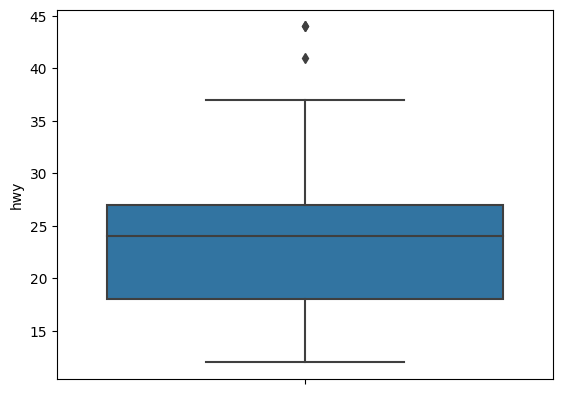

In [17]:
mpg = pd.read_csv('Data/mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [18]:
# 1사분위수(Q1, pct25)  : 하위 25%  - 상자 밑면
# 2사분위수(Q2, pct50)  : 하위 50%  - 상자 내 가로선
# 3사분위수(Q3, pct75)  : 하위 75%  - 상자 윗면
# IQR = Q3 - Q1
# 하한(Infimum)   : Q1 - (IQR * 1.5)  - 상자 밖 가로선
# 상한(Supremum)  : Q3 + (IQR * 1.5)  - 상자 밖 가로선
# 극단치(Outlier) : 하한과 상한을 벗어난 값  - 상자 밖 점

In [19]:
# 1사분위수 구하기
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [20]:
# 3사분위수 구하기
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [21]:
# IQR 구하기
iqr = pct75 - pct25
iqr

9.0

In [22]:
# 극단치 결측 처리하기 - p.193
infimum = pct25 - (iqr * 1.5) # 하한
supremum = pct75 + (iqr * 1.5) # 상한

# or(|), and(&) 연산 시 괄호 사용
mpg['hwy'] = np.where((mpg['hwy'] > supremum) | (mpg['hwy'] < infimum), np.nan, mpg['hwy'])
mpg['hwy'].isna().sum() # 결측치 빈도 확인

3

In [23]:
# 결측치 제거하고 분석
mpg.dropna(subset = ['hwy']).groupby('drv', as_index = False).agg(hwy_mean = ('hwy', 'mean'))

,drv,hwy_mean
0,4,19.174757
1,f,27.728155
2,r,21.000000
